In [2]:
import skimage.io as skio
import skimage.color as skc
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import rescale as rescale

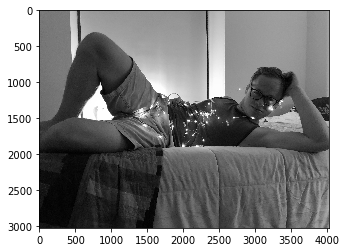

In [4]:
bed = skio.imread('bed.jpg')
bedg = skc.rgb2gray(bed)
plt.imshow(bedg, cmap='gray')

houseg =  [[175 181 187 ... 113 114 113]
 [175 181 186 ... 115 117 116]
 [177 182 186 ... 117 119 119]
 ...
 [ 29  26  24 ...  97 103 106]
 [ 26  25  23 ...  94 102 104]
 [ 24  23  23 ...  93 103 103]]


/home/rowen/miniconda3/envs/csci0452/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: oldhouse.png is a low contrast image
  warn('%s is a low contrast image' % fname)


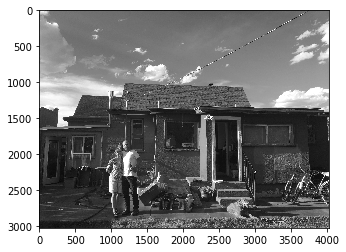

In [27]:
house = skio.imread('house.JPG')
houseg = skc.rgb2gray(house)
plt.imshow(houseg, cmap='gray')
houseg = (houseg*255).astype(int)
print('houseg = ',houseg)
skio.imsave('oldhouse.png', houseg)

In [31]:
def encodeGray(hidden, base, filename):
    # hidden and base are two numpy arrays
    # total number of pixels of hidden must be 1/8 of base
    hpx = hidden.shape[0] * hidden.shape[1]
    bpx = base.shape[0] * base.shape[1]
    base_shape = base.shape
    x = 2
    while(hpx > 1/8 * bpx):
        hidden_new = rescale(hidden, 1/x, anti_aliasing=True, multichannel=False)
        hpx = hidden_new.shape[0] * hidden_new.shape[1]
        x+= 1
    # unravel matrices into arrays
    hidden_new *= 255
    print("hidden shape = ", hidden_new.shape)
    print("hidden length = ", str(hpx))
    hidden = np.reshape(hidden_new, hpx)
    #base = (base*255).astype(int)
    #base = base.astype(int)
    base = np.reshape(base, bpx)
    # iterate through all elements of hidden, keep counter in base, increment for each shift in hidden
    # encode each element in hidden.shape in first 24 lowest bits of base
    hidden_shape = hidden_new.shape
    for i in range(0,2):
        for j in range(0,12):
            element = i * 12 + j
            bit = (np.right_shift(hidden_shape[i], j) & 1)
            #base[element] = np.left_shift(np.right_shift(base[element],1),1) + bit
            base[element] = ((base[element] // 2) * 2) +  bit
    # encode remaining bits in 
    count = 24
    for x in range(0, len(hidden)):
        for j in range(0,8):
            bit = (int(hidden[x]) >> j) & 1
            #base[count] = np.left_shift(np.right_shift(base[count],1),1) + bit
            base[count] = ((base[count] // 2) * 2) + bit
            count += 1
    base = np.reshape(base, base_shape)
    skio.imsave(filename, base)
    

encodeGray(bedg, houseg, 'newhouse.png')

/home/rowen/miniconda3/envs/csci0452/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


hidden shape =  (1008, 1344)
hidden length =  1354752


/home/rowen/miniconda3/envs/csci0452/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: newhouse.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [56]:
def decodeGray(base):
    # base is a 2D numpy array
    # first 2 12 byte intervals refer to shape of the hidden image
    bpx = base.shape[0] * base.shape[1]
    base = np.reshape(base, bpx)
    shape = [0, 0]
    for i in range(0,2):
        for j in range(0,12):
            bit = base[i * 12 + j] & 1
            shape[i] = shape[i] | ((2**j)* bit)
    print("shape = ", shape)
    length = shape[0] * shape[1]
    hidden = np.zeros(length, dtype="int8")
    # decode next length*8 bytes
    count = 0
    for x in range(24, length * 8):
            bit = base[x] & 1
            location = (x-24)//8
            hidden[location] = hidden[location] | ((2**count)*bit)
            count = (count + 1) % 8
    hidden_new = np.reshape(hidden, (shape[0], shape[1]))
    skio.imsave('hiddenImage.png', hidden_new)
            

new_house = skio.imread('newhouse.png')
old_house = skio.imread('oldhouse.png')
decodeGray(new_house)

shape =  [1008, 1344]


/home/rowen/miniconda3/envs/csci0452/lib/python3.7/site-packages/skimage/util/dtype.py:126: UserWarning: Possible sign loss when converting negative image of type int8 to positive image of type uint16.
  .format(dtypeobj_in, dtypeobj_out))
/home/rowen/miniconda3/envs/csci0452/lib/python3.7/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from int8 to uint16
  .format(dtypeobj_in, dtypeobj_out))


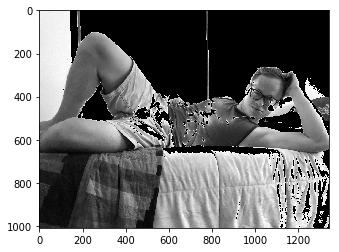

In [4]:
newbed = skio.imread('hiddenImage.png')
plt.imshow(newbed, cmap='gray')